In [ ]:
# logistic  & SVM

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 한글이 안되므로 한글 세팅해야 됨 
plt.rc('font', family = "gulim")
plt.rc('axes', unicode_minus = False)

In [5]:
iris_df = sns.load_dataset("Iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:, -1]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [22]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size = 0.2
)

In [23]:
ss = StandardScaler() #standard scaler
ss.fit(train_X)

train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)

In [24]:
print(type(train_scaled))

<class 'numpy.ndarray'>


In [197]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(train_scaled, train_y)
print("Train acc = {}".format(knn.score(train_scaled, train_y)))
print("Test acc = {}".format(knn.score(test_scaled, test_y)))

Train acc = 0.7793103448275862
Test acc = 0.5945945945945946


In [27]:
print("classes =", knn.classes_)
# print("feature names =", knn.feature_names_in_)
print("matric =", knn.n_samples_fit_)
print("classes =", knn.n_neighbors)

classes = ['setosa' 'versicolor' 'virginica']
matric = 120
classes = 5


------------------------

In [29]:
# wine 데이터를 사용해서 
wine = pd.read_csv(r'http://bit.ly/wine-date')
wine.head()


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [32]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [37]:
wine["class"] = wine["class"].astype("Int32").astype('category')
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   alcohol  6497 non-null   float64 
 1   sugar    6497 non-null   float64 
 2   pH       6497 non-null   float64 
 3   class    6497 non-null   category
dtypes: category(1), float64(3)
memory usage: 158.8 KB


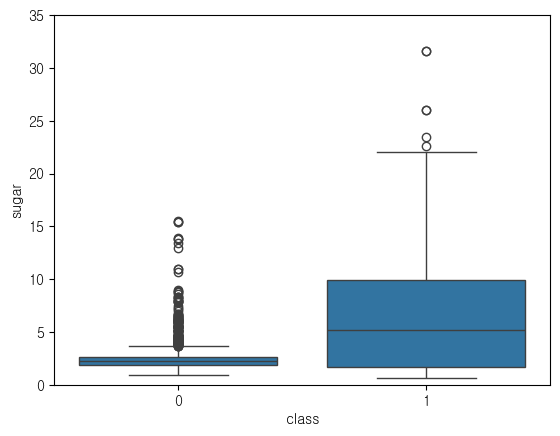

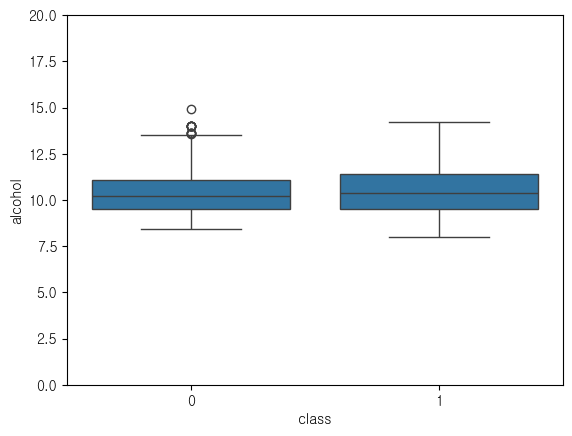

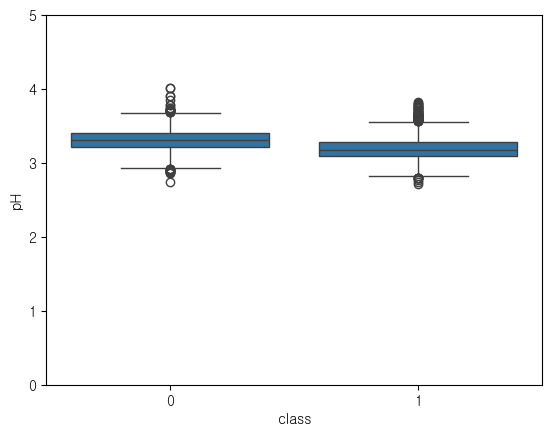

In [43]:
sns.boxplot(wine, x = "class", y = "sugar")
plt.ylim(0,35)
plt.show()

sns.boxplot(wine, x = "class", y = "alcohol")
plt.ylim(0,20)
plt.show()

sns.boxplot(wine, x = "class", y = "pH")
plt.ylim(0,5)
plt.show()

#레드와인과 화이트 와인은 당도에서차이가 있구나 

In [46]:
X = wine.iloc[:, :-1]
y = wine.iloc[:, -1]

print(X.shape)
print(y.shape)


(6497, 3)
(6497,)


In [48]:
## 데이터를 나누기
train_X, test_X, train_y, test_y =  train_test_split(
    X, y, test_size= 0.2
)

print("train shape =", train_X.shape)
print("test shape =", test_X.shape)

train shape = (5197, 3)
test shape = (1300, 3)


In [56]:
# scaling 
standScaler = StandardScaler()
standScaler.fit(train_X)

print(standScaler.mean_)
print(standScaler.scale_)

train_scaled = standScaler.transform(train_X)
test_scaled = standScaler.transform(test_X)

[10.47501379  5.45529151  3.2169771 ]
[1.18282074 4.79052966 0.1604007 ]


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier(criterion= "gini")
dt.fit(train_scaled, train_y)

print("Train acc = ", dt.score(train_scaled, train_y))
print("Test acc = ", dt.score(test_scaled, test_y))

#overfitting 임 
# train은 잘 맞는데 test가 안맞는거임

Train acc =  0.9971137194535309
Test acc =  0.86


In [61]:
dt = DecisionTreeClassifier(criterion= "gini", max_depth= 5, max_leaf_nodes= 10)
dt.fit(train_scaled, train_y)

print("Train acc = ", dt.score(train_scaled, train_y))
print("Test acc = ", dt.score(test_scaled, test_y))

# overfitting 방지
# 깊이와, max_leaf_nodes 를 제한하면 됨 


Train acc =  0.8654993265345392
Test acc =  0.8638461538461538


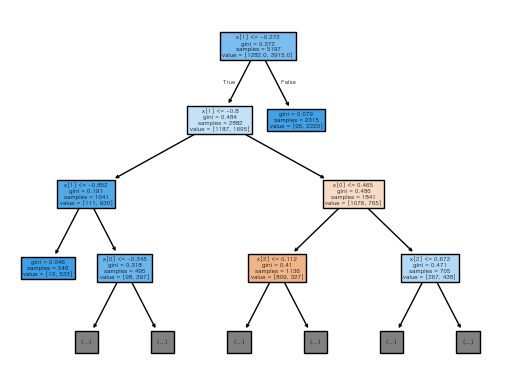

In [66]:
from sklearn.tree import plot_tree

plot_tree(dt, max_depth=3, filled = True)
plt.show()

In [69]:
print(dt.feature_importances_)
pd.DataFrame(dt.feature_importances_, index = train_X.columns)

[0.14582008 0.76842844 0.08575148]


,0
alcohol,0.145820
sugar,0.768428
pH,0.085751


In [110]:
# 교차검증 cross validation, cv
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV


In [111]:
cv_X_scaled = ss.fit_transform(X)
cv_result = cross_validate(dt, train_scaled, train_y, cv = 5)

In [112]:
print(cv_result["test_score"].mean())
# cv를 사용하면 데이터 분할을 하지 않아도 된다. 
# case 1) 데이터를 8:2로 나눈 후 cv시행 = 거의 유사한 결과가 나온다.
# 테스트를 나누었을 때 좋은 점 = 이론적으로는 비슷함.(나누든 나누지 않든) 모든 데이터가 참여하지 않지만 , cv는 모든 데이터가 참여한다. ?? 
# 이거 내가 까먹은건데 맞게 이해하고 적은건지 모르겠다. 

0.8520296883097653


In [113]:
print(y.value_counts())
# 0과 1의 벨런스가 안맞음 이대로 cv에 넣으면 랜덤으로 진행한다.

class
1    4898
0    1599
Name: count, dtype: int64


In [114]:
# 0과 1의 비율을 맞춰준 다음에 진행할 수 있다.
splitter = StratifiedKFold(n_splits =5, shuffle = True)
cv_result = cross_validate(dt, train_scaled, train_y, cv = 5)
print(cv_result["test_score"].mean())

0.852799659435848


In [127]:
## GridSearchCV
dt = DecisionTreeClassifier()
params = {
    "min_impurity_decrease" :np.arange(0.001, 0.01, 0.0001),
    "max_depth" : [ 3, 5, 7, 10, 12, 15, 20] ,
    "min_samples_split": np.arange(2, 100, 10)
}
# splitter = StratifiedKFold(n_splits =5, shuffle = True)
grid_cv = GridSearchCV(dt,
                       param_grid = params,
                       cv = splitter)
grid_cv.fit(cv_X_scaled, y)
print(grid_cv.cv_results_)


{'mean_fit_time': array([0.00238957, 0.00239229, 0.00259342, ..., 0.00219297, 0.0022027 ,
       0.00219455]), 'std_fit_time': array([0.00050192, 0.00049261, 0.00048854, ..., 0.00038477, 0.00040028,
       0.0003988 ]), 'mean_score_time': array([0.00101509, 0.00079942, 0.00079751, ..., 0.00099697, 0.00099444,
       0.00099669]), 'std_score_time': array([1.75198564e-05, 3.99944789e-04, 3.98755369e-04, ...,
       6.84390073e-07, 4.18422908e-06, 1.23977661e-06]), 'param_max_depth': masked_array(data=[3, 3, 3, ..., 20, 20, 20],
             mask=[False, False, False, ..., False, False, False],
       fill_value=999999), 'param_min_impurity_decrease': masked_array(data=[0.001, 0.001, 0.001, ..., 0.009900000000000003,
                   0.009900000000000003, 0.009900000000000003],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20), 'param_min_samples_split': masked_array(data=[2, 12, 22, ..., 72, 82, 92],
             mask=[False, False, False, ...,

In [116]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [119]:
print(grid_cv.best_params_)

{'max_depth': 20}


In [122]:
print(np.mean(grid_cv.cv_results_["mean_test_score"]))

0.8613854782630765


In [129]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV

In [131]:
rf = RandomForestClassifier(n_estimators= 100)

In [133]:
cv_X_scaled = ss.fit_transform(X) 

In [135]:
params = {
    "n_estimators" : [50, 80, 100, 120],
    "max_depth" : [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits= 5, shuffle= True)
grid_rf = GridSearchCV(rf, param_grid=params,  cv = splitter )
grid_rf.fit(cv_X_scaled, y)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12, 15],
                         'n_estimators': [50, 80, 100, 120]})

In [141]:
print(grid_rf.best_params_)
print(grid_rf.cv_results_["mean_test_score"])
print(grid_rf.best_score_)
print(grid_rf.cv_results_.keys())
# 최대 깊이는 15, 갯수는 80개가 적당하겠다고 나옴

{'max_depth': 15, 'n_estimators': 80}
[0.82746089 0.82591899 0.82884432 0.82869059 0.85623947 0.8605506
 0.85931983 0.86055131 0.86947699 0.87101664 0.8724022  0.87240197
 0.87948209 0.87855842 0.87948102 0.87978978 0.89025617 0.8941041
 0.89056541 0.89133381 0.89610552 0.89718209 0.89672126 0.89702884]
0.8971820927340557
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [147]:
rf_best  = RandomForestClassifier(n_estimators= 120,
                                  max_depth = 15)
# 나는 80나왔는데 교수님은 120나오심
# 시간이 많으면 max 10배로 러프하게 잡은 다음에 가장 좋은 값을 찾으면 된다.

rf_best.fit(cv_X_scaled, y)


RandomForestClassifier(max_depth=15, n_estimators=120)

In [152]:
print(rf_best.feature_importances_)
print(rf_best.score(cv_X_scaled, y))



[0.22511313 0.51122671 0.26366016]
0.9915345544097276


In [160]:
##
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
gb = GradientBoostingClassifier() 

params = {
    "n_estimators" : [50, 80, 100, 120],
    "max_depth" : [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits= 5, shuffle= True)
grid_gb = GridSearchCV(gb, param_grid=params,  cv = splitter )
grid_gb.fit(cv_X_scaled, y)

KeyboardInterrupt: 

In [155]:
print(grid_gb.cv_results_["mean_test_score"])
print(grid_gb.best_score_)
print(grid_gb.cv_results_.keys())
# 최대 깊이는 15, 갯수는 80개가 적당하겠다고 나옴

# gb가 더 잘맞는다. 보통은
# 보통은 다해보고 더 잘맞는거를 사용한다.
# 근데 랜덤포레스트도 잘 맞으면 굳이 gb까지 사용하지는 않는다.

[0.82453295 0.82945887 0.82484124 0.8266868  0.85870303 0.85808776
 0.85885746 0.86070445 0.86763013 0.8697854  0.86732185 0.86839936
 0.87671096 0.87809641 0.87809629 0.8788654  0.89179428 0.89456327
 0.89487108 0.89225428 0.89733369 0.89487227 0.89856469 0.89964245]
0.8996424468526085
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [179]:
gb = GradientBoostingClassifier() 

# params = {
#     "n_estimators" : [50, 80, 100, 120],
#     "max_depth" : [3, 5, 7, 9, 12, 15]
# }

splitter = StratifiedKFold(n_splits= 5, shuffle= True)
grid_gb = cross_validate(gb, cv_X_scaled, y,  cv = splitter )
# grid_gb.fit(cv_X_scaled, y)
print(np.mean(cv_score["test_score"]))


ValueError: Found input variables with inconsistent numbers of samples: [6497, 891]

In [227]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---------------------

# 실습

In [228]:
## DT, 랜덤포레스트, gb를 사용해서 survived를 예측하라 

# 스트링형을 정수형으로 바꾸기
titanic = pd.get_dummies(titanic, columns= ["sex"], drop_first= True)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


In [229]:
titanic.isna().sum()

survived         0
pclass           0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
sex_male         0
dtype: int64

In [230]:
titanic = titanic.dropna()

In [231]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_male
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
6,0,1,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,True
10,1,3,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,False
11,1,1,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,False


In [232]:
X = titanic.loc[:, "pclass":"fare"]
y = titanic.loc[:, "survived"]

print(X.shape)
print(y.shape)

(182, 5)
(182,)


In [233]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size = 0.2
)

In [234]:
ss = StandardScaler() #standard scaler
ss.fit(train_X)

train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)

print(type(train_scaled))

<class 'numpy.ndarray'>


In [299]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_y)

# 훈련 데이터 정확도
print("Train acc = {}".format(knn.score(train_scaled, train_y)))

# 테스트 데이터 정확도 (train_scaled가 아니라 test_scaled 사용)
print("Test acc = {}".format(knn.score(test_scaled, test_y)))


Train acc = 0.7655172413793103
Test acc = 0.6216216216216216


In [300]:
from sklearn.tree import DecisionTreeClassifier

In [302]:
dt = DecisionTreeClassifier(criterion= "gini")
dt.fit(train_scaled, train_y)

print("Train acc = ", dt.score(train_X, train_y))
print("Test acc = ", dt.score(test_X, test_y))

Train acc =  0.6689655172413793
Test acc =  0.7297297297297297


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [303]:
dt = DecisionTreeClassifier(criterion= "gini", max_depth= 2, max_leaf_nodes= 4)
dt.fit(train_scaled, train_y)

print("Train acc = ", dt.score(train_scaled, train_y))
print("Test acc = ", dt.score(test_scaled, test_y))
# 과적합 나오는데??? 

Train acc =  0.7655172413793103
Test acc =  0.6756756756756757


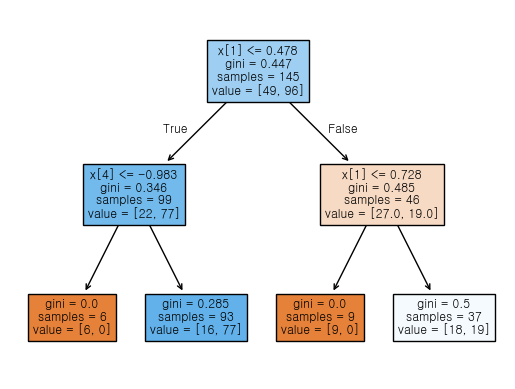

In [304]:
from sklearn.tree import plot_tree

plot_tree(dt, max_depth=3, filled = True)
plt.show()

In [305]:
print(dt.feature_importances_)
pd.DataFrame(dt.feature_importances_, index = train_X.columns)

[0.         0.61171063 0.         0.         0.38828937]


,0
pclass,0.000000
age,0.611711
sibsp,0.000000
parch,0.000000
fare,0.388289


In [241]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV

In [267]:
rf = RandomForestClassifier(n_estimators= 100)

In [268]:
cv_X_scaled = ss.fit_transform(X) 

In [266]:
params = {
    "n_estimators" : [50, 80, 100, 120],
    "max_depth" : [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits= 5, shuffle= True)
grid_rf = GridSearchCV(rf, param_grid=params,  cv = splitter )
grid_rf.fit(cv_X_scaled, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12, 15],
                         'n_estimators': [50, 80, 100, 120]})

In [269]:
print(grid_rf.best_params_)
print(grid_rf.cv_results_["mean_test_score"])
print(grid_rf.best_score_)
print(grid_rf.cv_results_.keys())
# 최대 깊이는 15, 갯수는 80개가 적당하겠다고 나옴

{'max_depth': 5, 'n_estimators': 120}
[0.72537538 0.71456456 0.70900901 0.70885886 0.71981982 0.73078078
 0.73633634 0.74189189 0.70885886 0.71396396 0.71426426 0.73093093
 0.68153153 0.66486486 0.68138138 0.69774775 0.66471471 0.66501502
 0.67597598 0.67042042 0.67057057 0.67042042 0.65945946 0.6484985 ]
0.741891891891892
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [270]:
rf_best  = RandomForestClassifier(n_estimators= 50,
                                  max_depth = 5)
rf_best.fit(cv_X_scaled, y)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [271]:
print(rf_best.feature_importances_)
print(rf_best.score(cv_X_scaled, y))
#랜덤포레스트 결과는 82퍼

[0.04728598 0.42234318 0.05672313 0.06360529 0.41004243]
0.8076923076923077


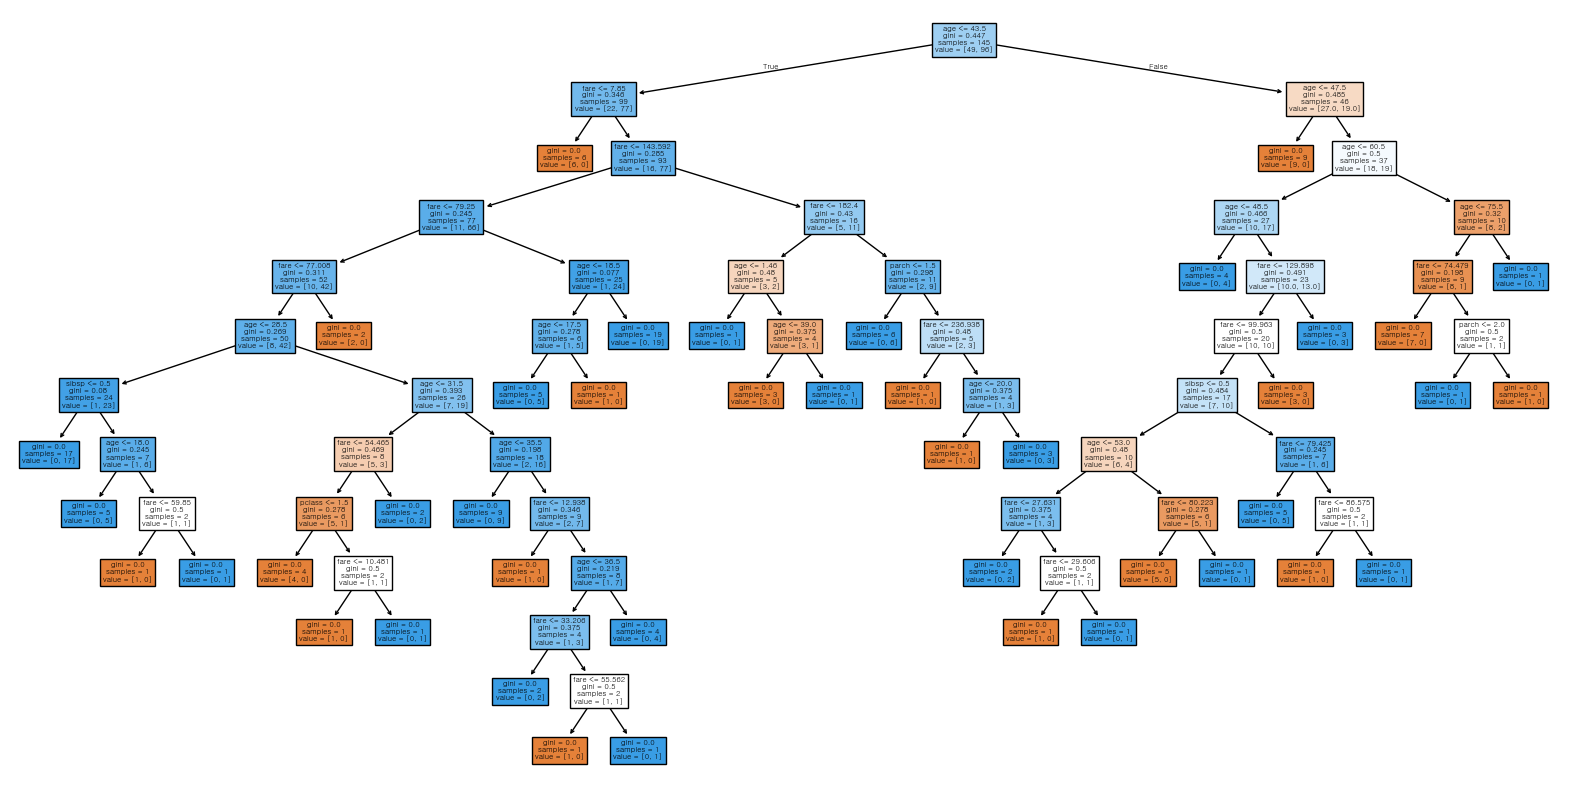

In [275]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 모델 학습
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

In [277]:
##
from sklearn.ensemble import GradientBoostingClassifier

In [291]:
gb = GradientBoostingClassifier() 

params = {
    "n_estimators" : [50, 80, 100, 120],
    "max_depth" : [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits= 5, shuffle= True)
grid_gb = GridSearchCV(gb, param_grid=params,  cv = splitter )
grid_gb.fit(cv_X_scaled, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12, 15],
                         'n_estimators': [50, 80, 100, 120]})

In [292]:
print(grid_gb.cv_results_["mean_test_score"])
print(grid_gb.best_score_)
print(grid_gb.cv_results_.keys())

[0.71441441 0.69219219 0.68693694 0.6975976  0.68183183 0.68693694
 0.68138138 0.69249249 0.69234234 0.68708709 0.6978979  0.7033033
 0.64279279 0.64279279 0.6536036  0.62672673 0.65345345 0.64264264
 0.64804805 0.64804805 0.62042042 0.5987988  0.59339339 0.5987988 ]
0.7144144144144144
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [295]:
gb = GradientBoostingClassifier() 
gb.fit(train_X, train_y)
params = {
    "n_estimators" : [50, 80, 100, 120],
    "max_depth" : [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits= 5, shuffle= True)
grid_gb = cross_validate(gb, train_X, train_y,  cv = splitter )
print(np.mean(grid_gb["test_score"]))
# 예측 점수가 72퍼라구? 

0.7172413793103448


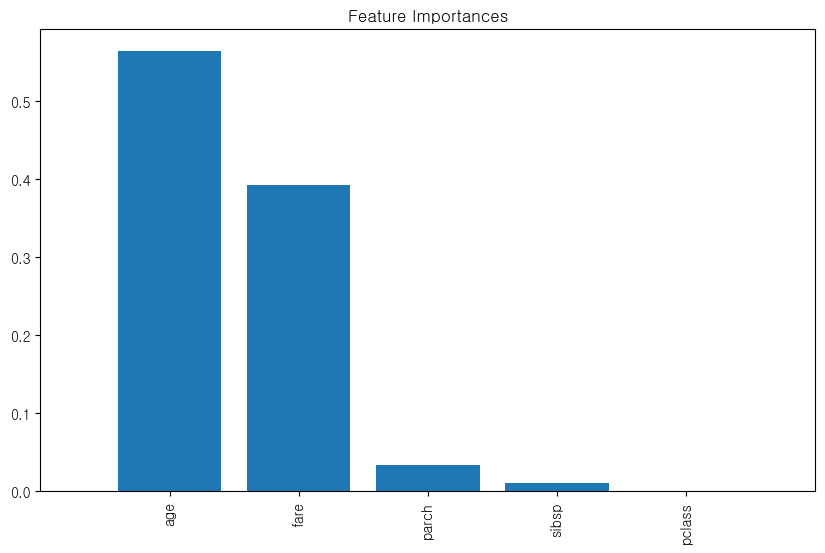

In [296]:
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

--------------------------------

In [323]:
# 강사님 답지
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [324]:
## DT, 랜덤포레스트, gb를 사용해서 survived를 예측하라 

titanic_df = titanic.loc[:, :"fare"]
titanic.dropna(subset = ["age"], axis = 0, inplace = True)


In [330]:
# 강사님 답지
X = titanic.loc[:,"pclass":"fare"]
y = titanic.loc[:,"survived"]

print("X shape  =", X.shape)
print("y shape  =", y.shape)

X.head()

X shape  = (714, 6)
y shape  = (714,)


,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [331]:
X = pd.get_dummies(X, columns=["sex"], drop_first=True)
print(X.head())

   pclass   age  sibsp  parch     fare  sex_male
0       3  22.0      1      0   7.2500      True
1       1  38.0      1      0  71.2833     False
2       3  26.0      0      0   7.9250     False
3       1  35.0      1      0  53.1000     False
4       3  35.0      0      0   8.0500      True


In [332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [334]:
## DT
dt = DecisionTreeClassifier()

params = {
    "max_depth" : range(3,20,1),
    "max_leaf_nodes" : range(3,20,1) 
}

splitter = StratifiedKFold(n_splits= 5, shuffle= True)
gs_dt= GridSearchCV(dt, param_grid=params, cv = splitter)
gs_dt.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'max_leaf_nodes': range(3, 20)})

In [339]:
print("best parameters = " , gs_dt.best_estimator_)
print("cv score = {:4f}".format(gs_dt.best_score_))

best parameters =  DecisionTreeClassifier(max_depth=7, max_leaf_nodes=18)
cv score = 0.827716


In [342]:
## rf 
rf = RandomForestClassifier()

params = {
    "n_estimators" : range(90, 120,1), 
    "max_depth" : range(3, 15, 1 )
}
splitter = StratifiedKFold(n_splits= 5, shuffle=True)
grid_rf = GridSearchCV(rf, param_grid = params, cv = splitter)
grid_rf.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 15),
                         'n_estimators': range(90, 120)})

In [345]:
print("best parameters = " , grid_rf.best_estimator_)
print("cv score = {:4f}".format(grid_rf.best_score_))

best parameters =  RandomForestClassifier(max_depth=7, n_estimators=91)
cv score = 0.826317


In [349]:
## gb 

gb = GradientBoostingClassifier() 

params ={
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "max_depth" : range(3,5,1)
}

splitter = StratifiedKFold(n_splits= 5, shuffle= True)
grid_gb = GridSearchCV(gb, param_grid=params, cv = splitter)
grid_gb.fit(X, y )


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 5)})

In [350]:
print("best parameters = " , grid_gb.best_estimator_)
print("cv score = {:4f}".format(grid_gb.best_score_))

best parameters =  GradientBoostingClassifier(learning_rate=np.float64(0.1))
cv score = 0.820723


-----------------------------------

In [11]:
wine = pd.read_csv('http://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [12]:
wine["class"] = wine["class"].astype("Int32").astype('category')
wine.head()
wine.info

<bound method DataFrame.info of       alcohol  sugar    pH class
0         9.4    1.9  3.51     0
1         9.8    2.6  3.20     0
2         9.8    2.3  3.26     0
3         9.8    1.9  3.16     0
4         9.4    1.9  3.51     0
...       ...    ...   ...   ...
6492     11.2    1.6  3.27     1
6493      9.6    8.0  3.15     1
6494      9.4    1.2  2.99     1
6495     12.8    1.1  3.34     1
6496     11.8    0.8  3.26     1

[6497 rows x 4 columns]>

In [14]:
X = wine.iloc[:, :-1]
y = wine["class"]


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
## LogisticRegression 은 전처리 하는게 좋다 
# 표준화 (StandardScaler)
standScaler = StandardScaler()
X_scaled = standScaler.fit_transform(X)

# 표준화된 데이터의 첫 10개 출력
print(X_scaled[:10])

[[-0.91546416 -0.7447781   1.81308951]
 [-0.58006813 -0.59764007 -0.11507303]
 [-0.58006813 -0.66069923  0.25811972]
 [-0.58006813 -0.7447781  -0.3638682 ]
 [-0.91546416 -0.7447781   1.81308951]
 [-0.91546416 -0.76579782  1.81308951]
 [-0.91546416 -0.80783726  0.50691489]
 [-0.41237012 -0.89191614  1.06670401]
 [-0.83161516 -0.72375839  0.88010764]
 [ 0.00687492  0.13805008  0.81790884]]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [30]:
lr = LogisticRegression()

splitter = StratifiedKFold(n_splits= 5, shuffle= True)
scores = cross_validate(lr, X_scaled, y, cv = splitter)



In [32]:
print(scores["test_score"])

[0.78076923 0.77461538 0.78829869 0.7752117  0.78675905]


In [33]:
lr.fit(X_scaled, y)

LogisticRegression()

In [38]:
print("probability = \n", lr.predict_proba(X_scaled[:10]))
# 0일 확률이 0.77 1일 확률이 0.22 이니까 0으로 판단. 
# logistic Regression이 사실 더 들어가서 공부해야되는데 수업에서는 다루기 어려우니, 넘어가겠다. 
# 나중에 공부해봐라~ 
print("coefficient = \n", lr.coef_, lr.intercept_)
print("classes = \n", lr.classes_)

probability = 
 [[0.77202535 0.22797465]
 [0.3608078  0.6391922 ]
 [0.44961173 0.55038827]
 [0.37654449 0.62345551]
 [0.77202535 0.22797465]
 [0.77810814 0.22189186]
 [0.59800521 0.40199479]
 [0.66068716 0.33931284]
 [0.61725242 0.38274758]
 [0.19105714 0.80894286]]
coefficient = 
 [[ 0.53227906  1.65998624 -0.70993564]] [1.79099774]
classes = 
 [0 1]


In [ ]:
print()